# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [34]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/florian/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


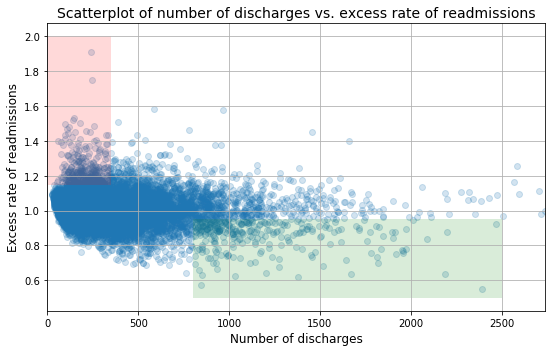

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
hospital_read_df[hospital_read_df['Hospital Name'] == 'FROEDTERT MEMORIAL LUTHERAN HOSPITAL']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
5597,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-AMI-HRRP,185,NaN,1.0158,16.8,16.6,32.0,07/01/2010,06/30/2013
10318,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HF-HRRP,562,NaN,0.9493,22.1,23.3,121.0,07/01/2010,06/30/2013
10510,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-PN-HRRP,385,NaN,0.9462,17.2,18.2,63.0,07/01/2010,06/30/2013
12739,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-COPD-HRRP,303,NaN,0.8843,20.2,22.9,52.0,07/01/2010,06/30/2013


In [8]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [9]:
few_disch_err = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].dropna()

In [10]:
many_disch_err = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].dropna()

In [11]:
np.mean(few_disch_err)

1.0226183501683506

In [12]:
np.mean(many_disch_err)

0.9783354211663071

In [51]:
np.mean(few_disch_err)-np.mean(many_disch_err)

0.04428292900204345

In [13]:
np.var(few_disch_err)

0.003358688872025533

In [14]:
np.var(many_disch_err)

0.01437065956607532

In [15]:
from scipy.stats import ttest_ind

In [16]:
t, p = ttest_ind(few_disch_err, many_disch_err, equal_var = False)

In [17]:
p

1.2752435451140344e-13

### The independent samples students t test and the p value associated with it show that the difference in mean excess rate of readmission between the group with less than 100 discharges and the group with more than 1000 discharges is statistically significant at an alpha level of 0.01.

In [18]:
few_disch_err_over_1_prop = sum(few_disch_err > 1)/len(few_disch_err)
few_disch_err_over_1_prop

0.6321548821548821

In [19]:
many_disch_err_over_1_prop = sum(many_disch_err > 1)/len(many_disch_err)
many_disch_err_over_1_prop

0.4449244060475162

In [52]:
few_disch_err_over_1_prop - many_disch_err_over_1_prop

0.18723047610736593

In [20]:
from statsmodels.stats.proportion import proportions_ztest


In [21]:
z, p = proportions_ztest([sum(few_disch_err > 1),sum(many_disch_err > 1)],[len(few_disch_err), len(many_disch_err)])

In [22]:
p

4.412449691085916e-12

###  The two proportion z test applied above and the p value associated with it show that the difference of the proportion of mean excess rates of readmission above 1.0 between between the group with less than 100 discharges and the group with more than 1000 discharges is statistically significant at an alpha level of 0.01.

In [23]:
from scipy.stats import pearsonr

In [24]:
r, p = pearsonr(x,y)

In [25]:
print(r,p)

-0.09309554287590441 1.5022756426464526e-23


### The correlation overall between the  mean excess rates of readmission and the number of discharges is weak, but statistically significant at an alpha level of 0.01 .

In [28]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [29]:
clean_hospital_read_df.pivot_table(index='Measure Name', values='Excess Readmission Ratio', aggfunc=np.mean)

,Excess Readmission Ratio
Measure Name,
READM-30-AMI-HRRP,1.007526
READM-30-COPD-HRRP,1.004288
READM-30-HF-HRRP,1.003460
READM-30-HIP-KNEE-HRRP,1.027759
READM-30-PN-HRRP,1.004785


### Above I've checked whether there is a big difference between mean Excess Readmission Ratio of different measures. If there were big statistically significant differences, they might explain why there is a correlation between the Excess Readmission Ratio and number of discharges. But apparently there isn't such a difference.

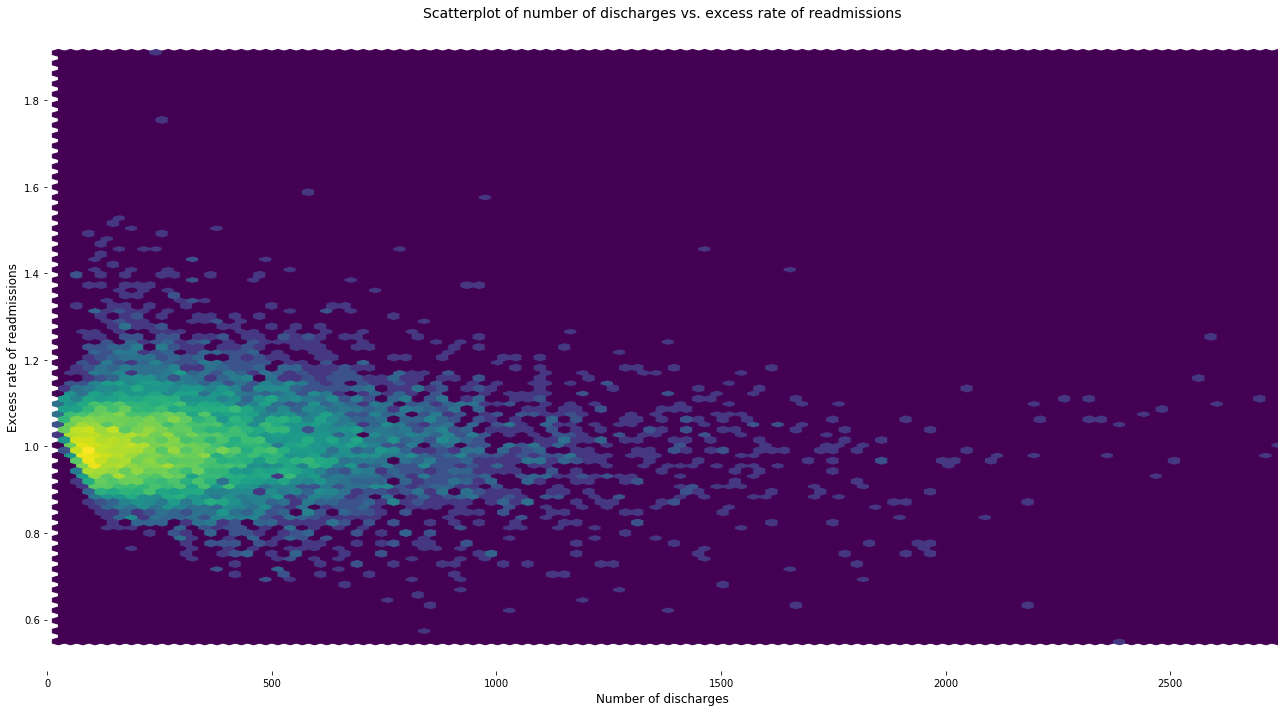

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
hexe = ax.hexbin(x, y, bins='log')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
sns.despine(bottom=True, left=True)
ax.grid(False)
fig.tight_layout()

### The big advantage of the scatter plot provided by the exercise is that it relatively clearly shows the correlation between two measurements. The disadvantage is, that most individual points can't be distinguished from each other, because there are are too many points on little area. On a Hexbin plot I've created above, one can see where on the plot most points lie.

Text(0, 0.5, 'Number of occurrences in bin')

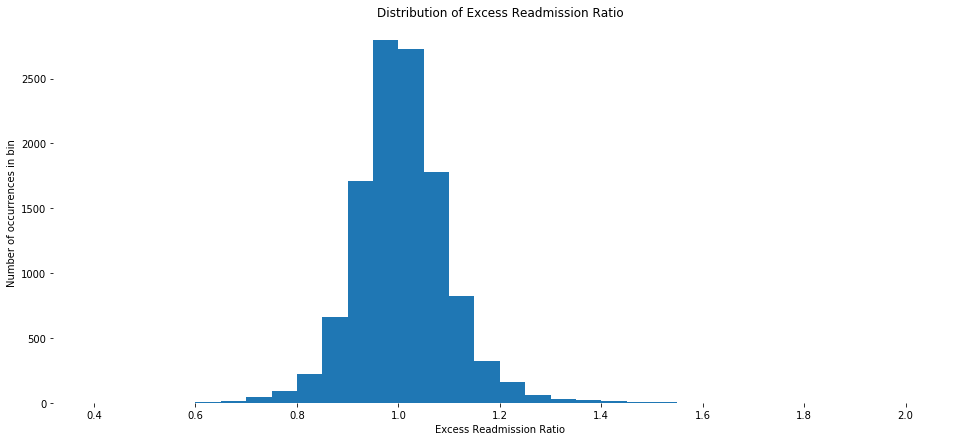

In [50]:
plt.figure(figsize=(16,7))
plt.hist(clean_hospital_read_df['Excess Readmission Ratio'], bins=32, range=(0.4,2))
sns.despine(left=True, bottom=True)
plt.title('Distribution of Excess Readmission Ratio')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Number of occurrences in bin')

# Conclusions:

* **The groups compared (with less than 100 and more than 1000 discharges) do indeed differ when it comes to the mean Excessive Readmission Ratio and the proportion of this ratio over 1.0. Those differences are statistically significant. Furthermore there is a weak but statistically significance** <br/> <br/>
  
* **The difference in means of those two groups is very low (about 0.04). In my eyes this is not practically significant as the data is spread out and the two groups do largely overlap when it comes to Excess Readmission Ratio. The difference in proportion of the ratio that is above 1.0 on the other hand is rather high (about 0.19). But this is also not practically significant as most ratio values are around 1.0.** <br/><br/>

* **While I do agree with the statistical conclusions of the analysis of the exercise, I wouldn't make the same recommendations though, as the findings do not seem to be of practical significance. Instead of focusing on hospitals with small capacity, I would directly focus on hospitals that have a low Excess Readmission Ratio. Any measurement, such as for example the requirement "to demonstrate upgraded resource allocation for quality care to continue operation" should be performed with those hospitals that do have an Excess Readmission Ratio below a threshold and not with those with a low discharge rate. Doing the latter would not be efficient as the negative correlation between the discharge rate and Excess Readmission Ratio is only very weak.** <br/><br/>

* **If there are enough resources I would recommend to collect more resources and to search for correlations of other variables with Excess Readmission Ratio.**